<a href="https://colab.research.google.com/github/ckraju/mits/blob/master/diabetes_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving pima-indian-diabetes.csv to pima-indian-diabetes.csv


In [2]:
import pandas as pd


In [4]:
import io

df2 = pd.read_csv(io.BytesIO(uploaded['pima-indian-diabetes.csv']))

# Dataset is now stored in a Pandas Dataframe

In [5]:
# Visualize training history
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy
from keras.utils import to_categorical

In [7]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load pima indians dataset
dataset = numpy.loadtxt("pima-indian-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

In [8]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ],
       [  5.   , 120.   ,  70.   , ...,  25.   ,   0.25 ,  29.   ]])

In [9]:
Y

array([1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 0., 0., 0.

In [10]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

In [11]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
history = model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=10)
# list all data in history
print(history.history.keys())

Epoch 1/150
52/52 [==============================] - 1s 6ms/step - loss: 0.6929 - accuracy: 0.5204 - val_loss: 0.6824 - val_accuracy: 0.6732
Epoch 2/150
52/52 [==============================] - 0s 2ms/step - loss: 0.6828 - accuracy: 0.6241 - val_loss: 0.6617 - val_accuracy: 0.6732
Epoch 3/150
52/52 [==============================] - 0s 2ms/step - loss: 0.6655 - accuracy: 0.6550 - val_loss: 0.6528 - val_accuracy: 0.6732
Epoch 4/150
52/52 [==============================] - 0s 2ms/step - loss: 0.6599 - accuracy: 0.6400 - val_loss: 0.6488 - val_accuracy: 0.6732
Epoch 5/150
52/52 [==============================] - 0s 2ms/step - loss: 0.6699 - accuracy: 0.6100 - val_loss: 0.6440 - val_accuracy: 0.6732
Epoch 6/150
52/52 [==============================] - 0s 2ms/step - loss: 0.6493 - accuracy: 0.6570 - val_loss: 0.6464 - val_accuracy: 0.6732
Epoch 7/150
52/52 [==============================] - 0s 2ms/step - loss: 0.6333 - accuracy: 0.6771 - val_loss: 0.6414 - val_accuracy: 0.6732
Epoch 8/150
5

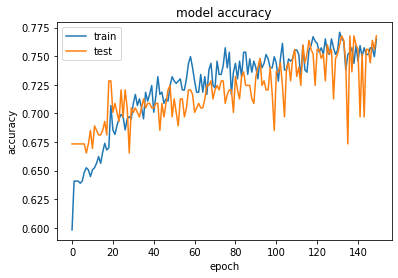

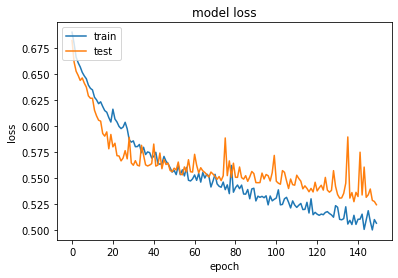

In [14]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()